In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import entropy

PREPROCESSING

In [150]:
df = pd.read_csv('heart_disease.csv')
print(df)

       Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease D

In [151]:
df.isnull().sum()
df.drop(columns=['Alcohol Consumption'], inplace=True)
df = df.dropna()

In [152]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

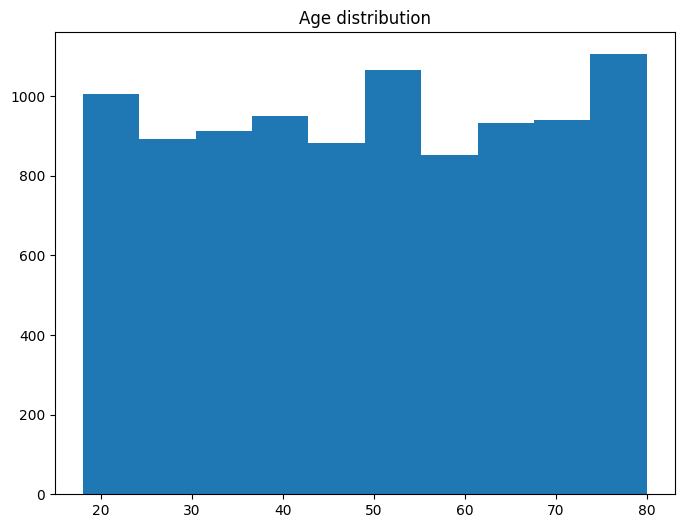

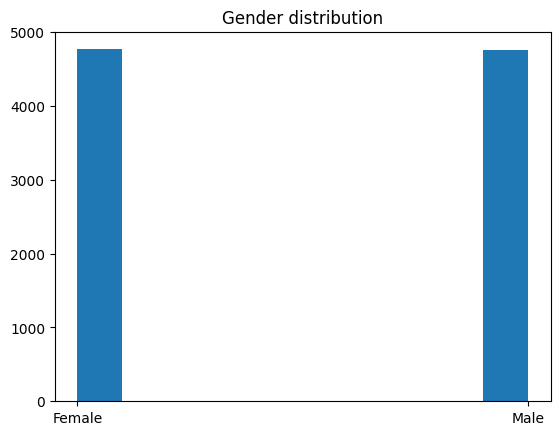

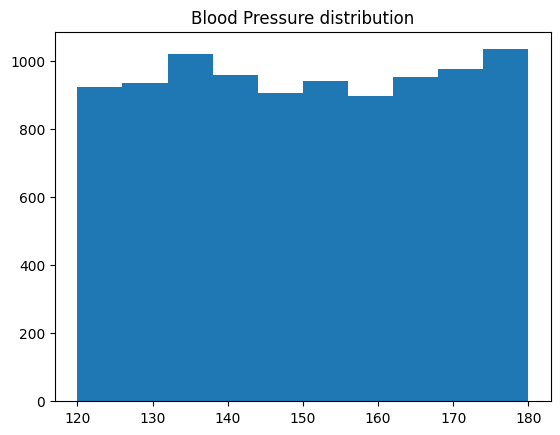

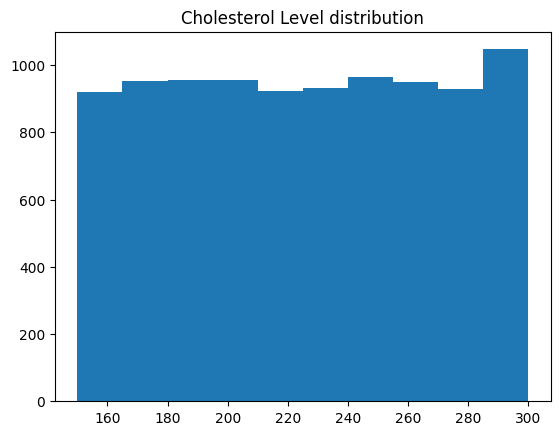

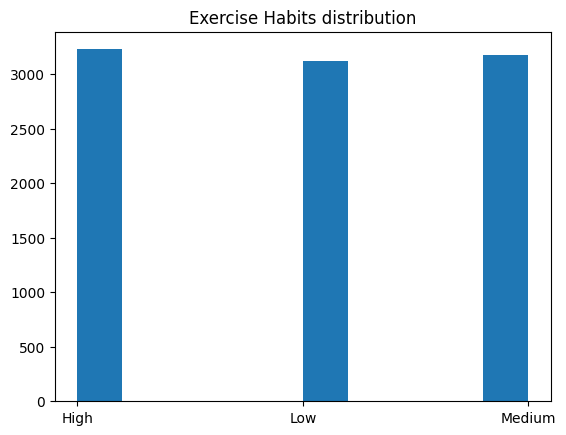

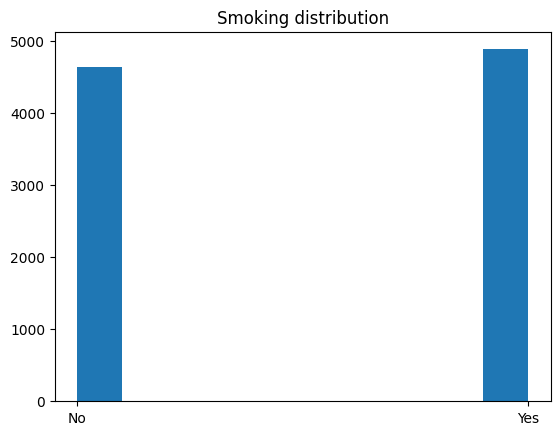

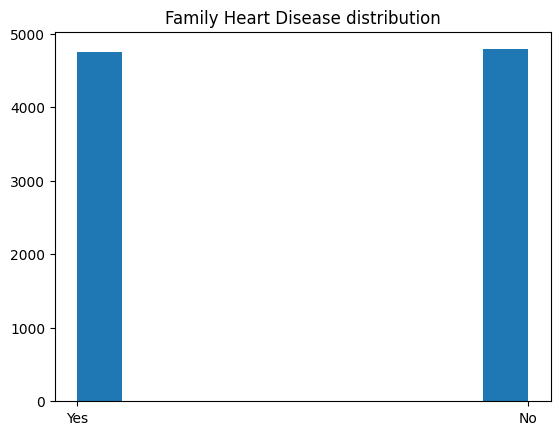

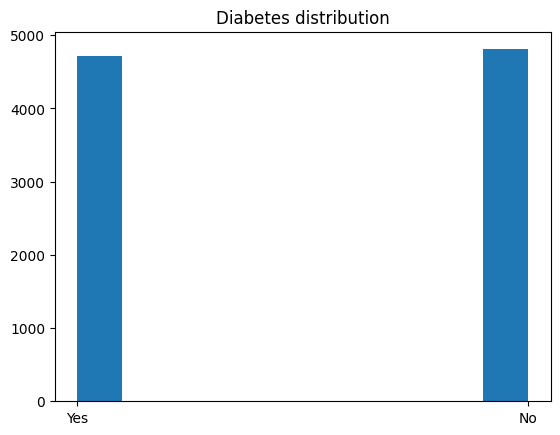

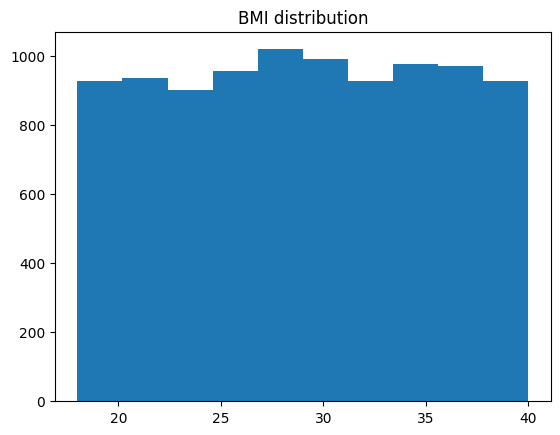

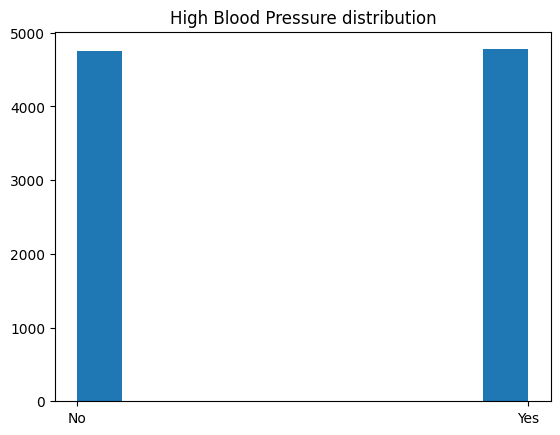

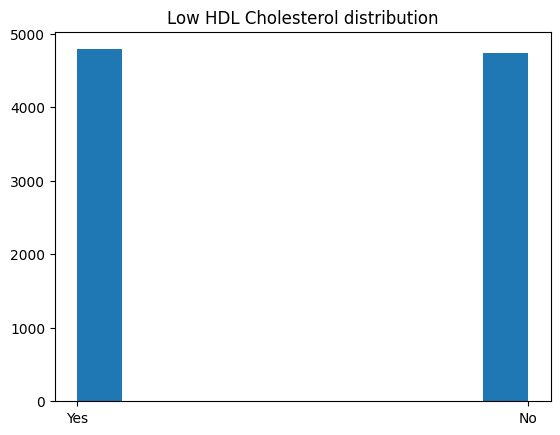

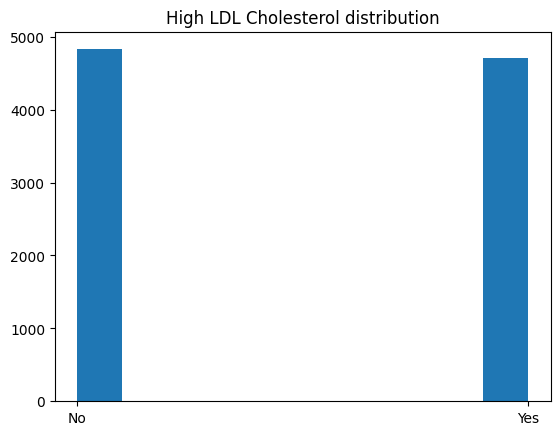

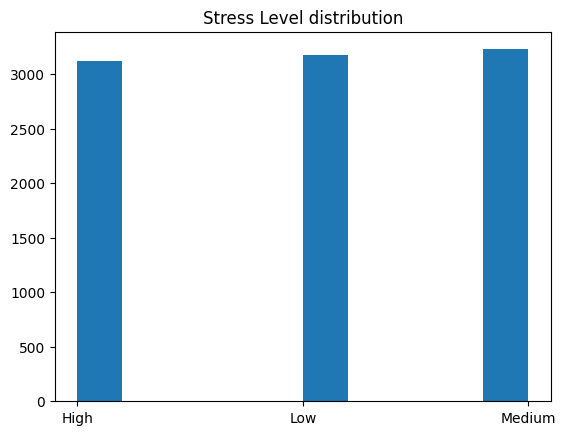

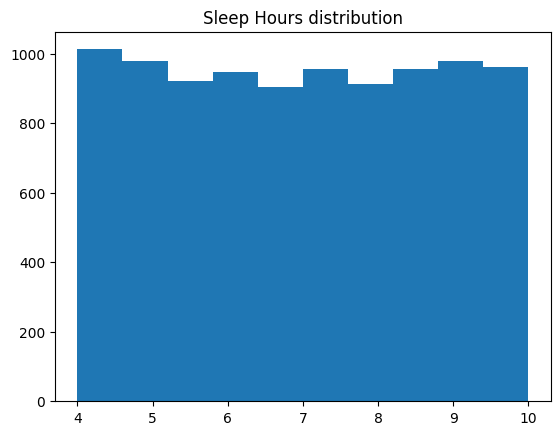

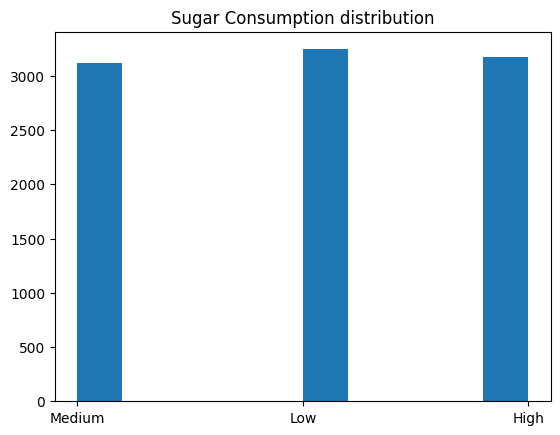

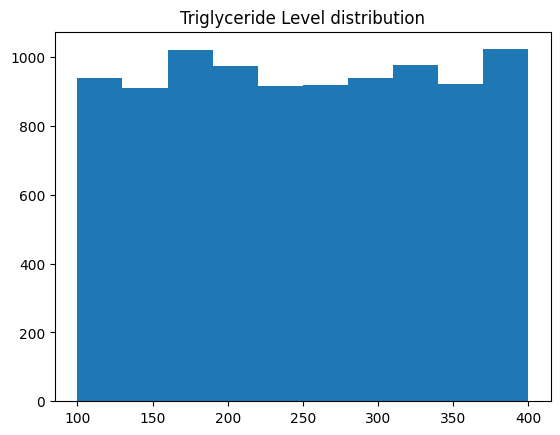

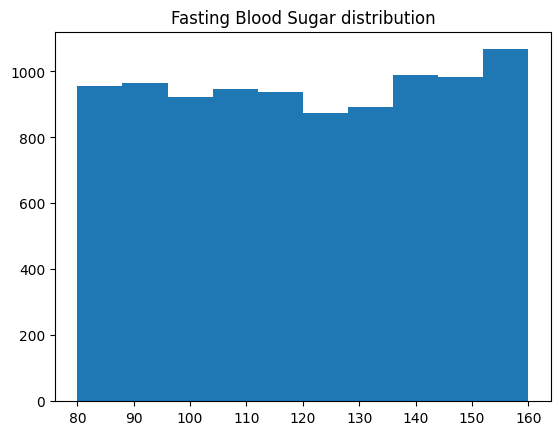

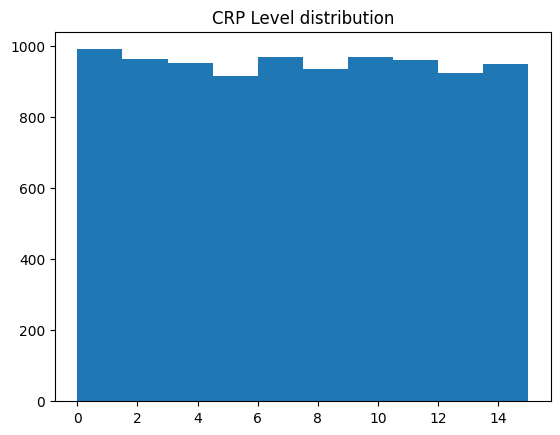

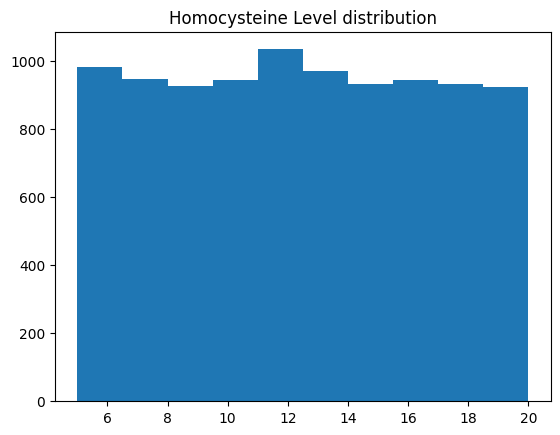

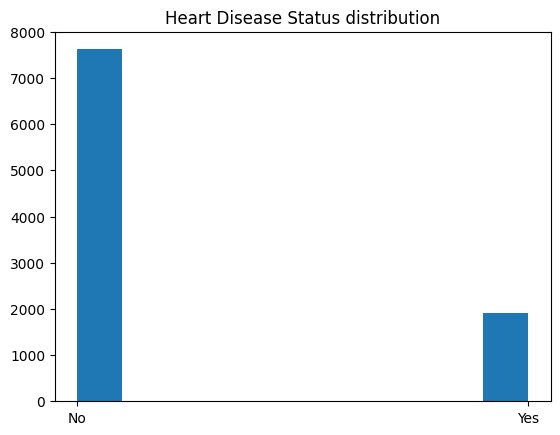

In [153]:
fig = plt.figure(figsize=(8,6))

for column in df.columns:
    plt.hist(df[column])
    plt.title(f'{column} distribution')
    plt.show()

In [154]:
print(df.dtypes)

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object


In [155]:
columns_to_encode = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status']
for column in columns_to_encode:
    print(f'{column}', df[column].values)
ordinal_columns = ['Exercise Habits', 'Stress Level', 'Sugar Consumption']
for column in ordinal_columns:
    print(f'{column}', df[column].values)

Gender ['Female' 'Male' 'Female' ... 'Male' 'Male' 'Female']
Smoking ['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
Family Heart Disease ['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']
Diabetes ['Yes' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
High Blood Pressure ['No' 'No' 'Yes' ... 'No' 'Yes' 'No']
Low HDL Cholesterol ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'Yes']
High LDL Cholesterol ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Heart Disease Status ['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']
Exercise Habits ['High' 'Low' 'High' ... 'High' 'Low' 'Medium']
Stress Level ['High' 'Low' 'High' ... 'Low' 'High' 'Medium']
Sugar Consumption ['Medium' 'Low' 'High' ... 'Low' 'Medium' 'High']


In [156]:
order = ['Low', 'Medium', 'High']
orders = [order, order, order]
print(orders)

[['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']]


In [157]:
oe = OrdinalEncoder(categories=orders)
oe.fit_transform(df[ordinal_columns])
df[ordinal_columns] = oe.transform(df[ordinal_columns])

In [158]:
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [159]:
for column in columns_to_encode:
    print(f'{column}', df[column].values)
for column in ordinal_columns:
    print(f'{column}', df[column].values)

Gender [0 1 0 ... 1 1 0]
Smoking [0 0 1 ... 1 1 1]
Family Heart Disease [1 0 1 ... 0 0 1]
Diabetes [1 0 0 ... 1 1 1]
High Blood Pressure [0 0 1 ... 0 1 0]
Low HDL Cholesterol [1 1 0 ... 1 0 1]
High LDL Cholesterol [0 1 1 ... 1 1 1]
Heart Disease Status [0 0 0 ... 1 1 1]
Exercise Habits [2. 0. 2. ... 2. 0. 1.]
Stress Level [2. 0. 2. ... 0. 2. 1.]
Sugar Consumption [1. 0. 2. ... 0. 1. 2.]


In [160]:
print(df)
encoded_df = df.copy()

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
1     69.0       0           146.0              286.0              2.0   
2     46.0       1           126.0              216.0              0.0   
3     32.0       0           122.0              293.0              2.0   
4     60.0       1           166.0              242.0              0.0   
5     25.0       1           152.0              257.0              0.0   
...    ...     ...             ...                ...              ...   
9995  25.0       0           136.0              243.0              1.0   
9996  38.0       1           172.0              154.0              1.0   
9997  73.0       1           152.0              201.0              2.0   
9998  23.0       1           142.0              299.0              0.0   
9999  38.0       0           128.0              193.0              1.0   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
1           0                 

In [161]:
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'recall = {recall}')

accuracy = 0.5186156266386995
f1 = 0.2783018867924528
recall = 0.46701846965699206


In [164]:
print(y.value_counts(normalize=True))


Heart Disease Status
0    0.799517
1    0.200483
Name: proportion, dtype: float64


In [165]:
print(encoded_df['Gender'].value_counts())


Gender
0    4768
1    4764
Name: count, dtype: int64


In [166]:
X_encoded = encoded_df.drop(columns=['Heart Disease Status'])

entropy_values = {}

for col in X_encoded.columns:
    probs = X_encoded[col].value_counts(normalize=True)
    ent = entropy(probs, base=2)
    entropy_values[col] = ent

entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Feature', 'Entropy'])
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

                 Feature    Entropy
18    Homocysteine Level  13.218563
8                    BMI  13.218563
17             CRP Level  13.218563
13           Sleep Hours  13.218563
15    Triglyceride Level   8.209929
3      Cholesterol Level   7.228233
16   Fasting Blood Sugar   6.332827
0                    Age   5.971243
2         Blood Pressure   5.925405
4        Exercise Habits   1.584836
12          Stress Level   1.584836
14     Sugar Consumption   1.584758
1                 Gender   1.000000
9    High Blood Pressure   0.999997
6   Family Heart Disease   0.999987
10   Low HDL Cholesterol   0.999983
7               Diabetes   0.999941
11  High LDL Cholesterol   0.999878
5                Smoking   0.999543


In [167]:
mean_entropy = entropy_df['Entropy'].mean()
top_entropy_features = entropy_df[entropy_df['Entropy'] >= mean_entropy]['Feature'].tolist()
print(top_entropy_features)
encoded_df[top_entropy_features].head()

['Homocysteine Level', 'BMI', 'CRP Level', 'Sleep Hours', 'Triglyceride Level', 'Cholesterol Level', 'Fasting Blood Sugar', 'Age', 'Blood Pressure']


,Homocysteine Level,BMI,CRP Level,Sleep Hours,Triglyceride Level,Cholesterol Level,Fasting Blood Sugar,Age,Blood Pressure
1,19.298875,25.221799,9.355389,8.744034,133.0,286.0,157.0,69.0,146.0
2,11.230926,29.855447,12.709873,4.440440,393.0,216.0,92.0,46.0,126.0
3,5.961958,24.130477,12.509046,5.249405,293.0,293.0,94.0,32.0,122.0
4,8.153887,20.486289,10.381259,7.030971,263.0,242.0,154.0,60.0,166.0
5,10.815983,28.144681,4.297575,5.504876,126.0,257.0,91.0,25.0,152.0


In [168]:
X_entropy = encoded_df[top_entropy_features]
y_entropy = encoded_df['Heart Disease Status']
X_entropy_train, X_entropy_test, y_entropy_train, y_entropy_test = train_test_split(X_entropy, y_entropy, test_size=0.2, random_state=42)

In [169]:
scaler = MinMaxScaler()
X_entropy_train_scaled = scaler.fit_transform(X_entropy_train)
X_entropy_test_scaled = scaler.transform(X_entropy_test)

In [170]:
#Log reg
logreg_entropy = LogisticRegression(class_weight='balanced')
logreg_entropy.fit(X_entropy_train_scaled, y_entropy_train)
y_entropy_pred = logreg_entropy.predict(X_entropy_test_scaled)

In [171]:
accuracy_entropy = accuracy_score(y_entropy_test, y_entropy_pred)
f1_entropy = f1_score(y_entropy_test, y_entropy_pred)
recall_entropy = recall_score(y_entropy_test, y_entropy_pred)
print(f'accuracy_entropy = {accuracy_entropy}')
print(f'f1_entropy = {f1_entropy}')
print(f'recall_entropy = {recall_entropy}')
print('')
print(f'accuracy = {accuracy}')
print(f'f1 = {f1}')
print(f'recall = {recall}')

accuracy_entropy = 0.5102254850550603
f1_entropy = 0.2924242424242424
recall_entropy = 0.5092348284960422

accuracy = 0.5186156266386995
f1 = 0.2783018867924528
recall = 0.46701846965699206


In [172]:
#Decision Tree

In [173]:
#Random Forest